# Model Schematic

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors
from matplotlib import gridspec

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


# Ice Draft

In [3]:
#open input IC bathymetry and topo for expts Ocean1 and Ocean2
Ocean1_input = xr.open_dataset(baserepo+'Ocean1_input_geom_v1.01.nc')
Ocean2_input = xr.open_dataset(baserepo+'Ocean2_input_geom_v1.01.nc')
Ocean1_input

<xarray.Dataset> Size: 2MB
Dimensions:            (x: 480, y: 80)
Coordinates:
  * x                  (x) float64 4kB 3.205e+05 3.215e+05 ... 7.995e+05
  * y                  (y) float64 640B 500.0 1.5e+03 ... 7.85e+04 7.95e+04
Data variables:
    upperSurface       (y, x) float64 307kB ...
    lowerSurface       (y, x) float64 307kB ...
    bedrockTopography  (y, x) float64 307kB ...
    floatingMask       (y, x) float64 307kB ...
    groundedMask       (y, x) float64 307kB ...
    openOceanMask      (y, x) float64 307kB ...

In [4]:
cmap = cm.cm.thermal
grey_thermal = plt.get_cmap(cmap)
grey_thermal.set_bad('gray')

cmap = cm.cm.haline
grey_haline = plt.get_cmap(cmap)
grey_haline.set_bad('gray')

In [11]:
plt.rcParams.update({'font.size': 13})


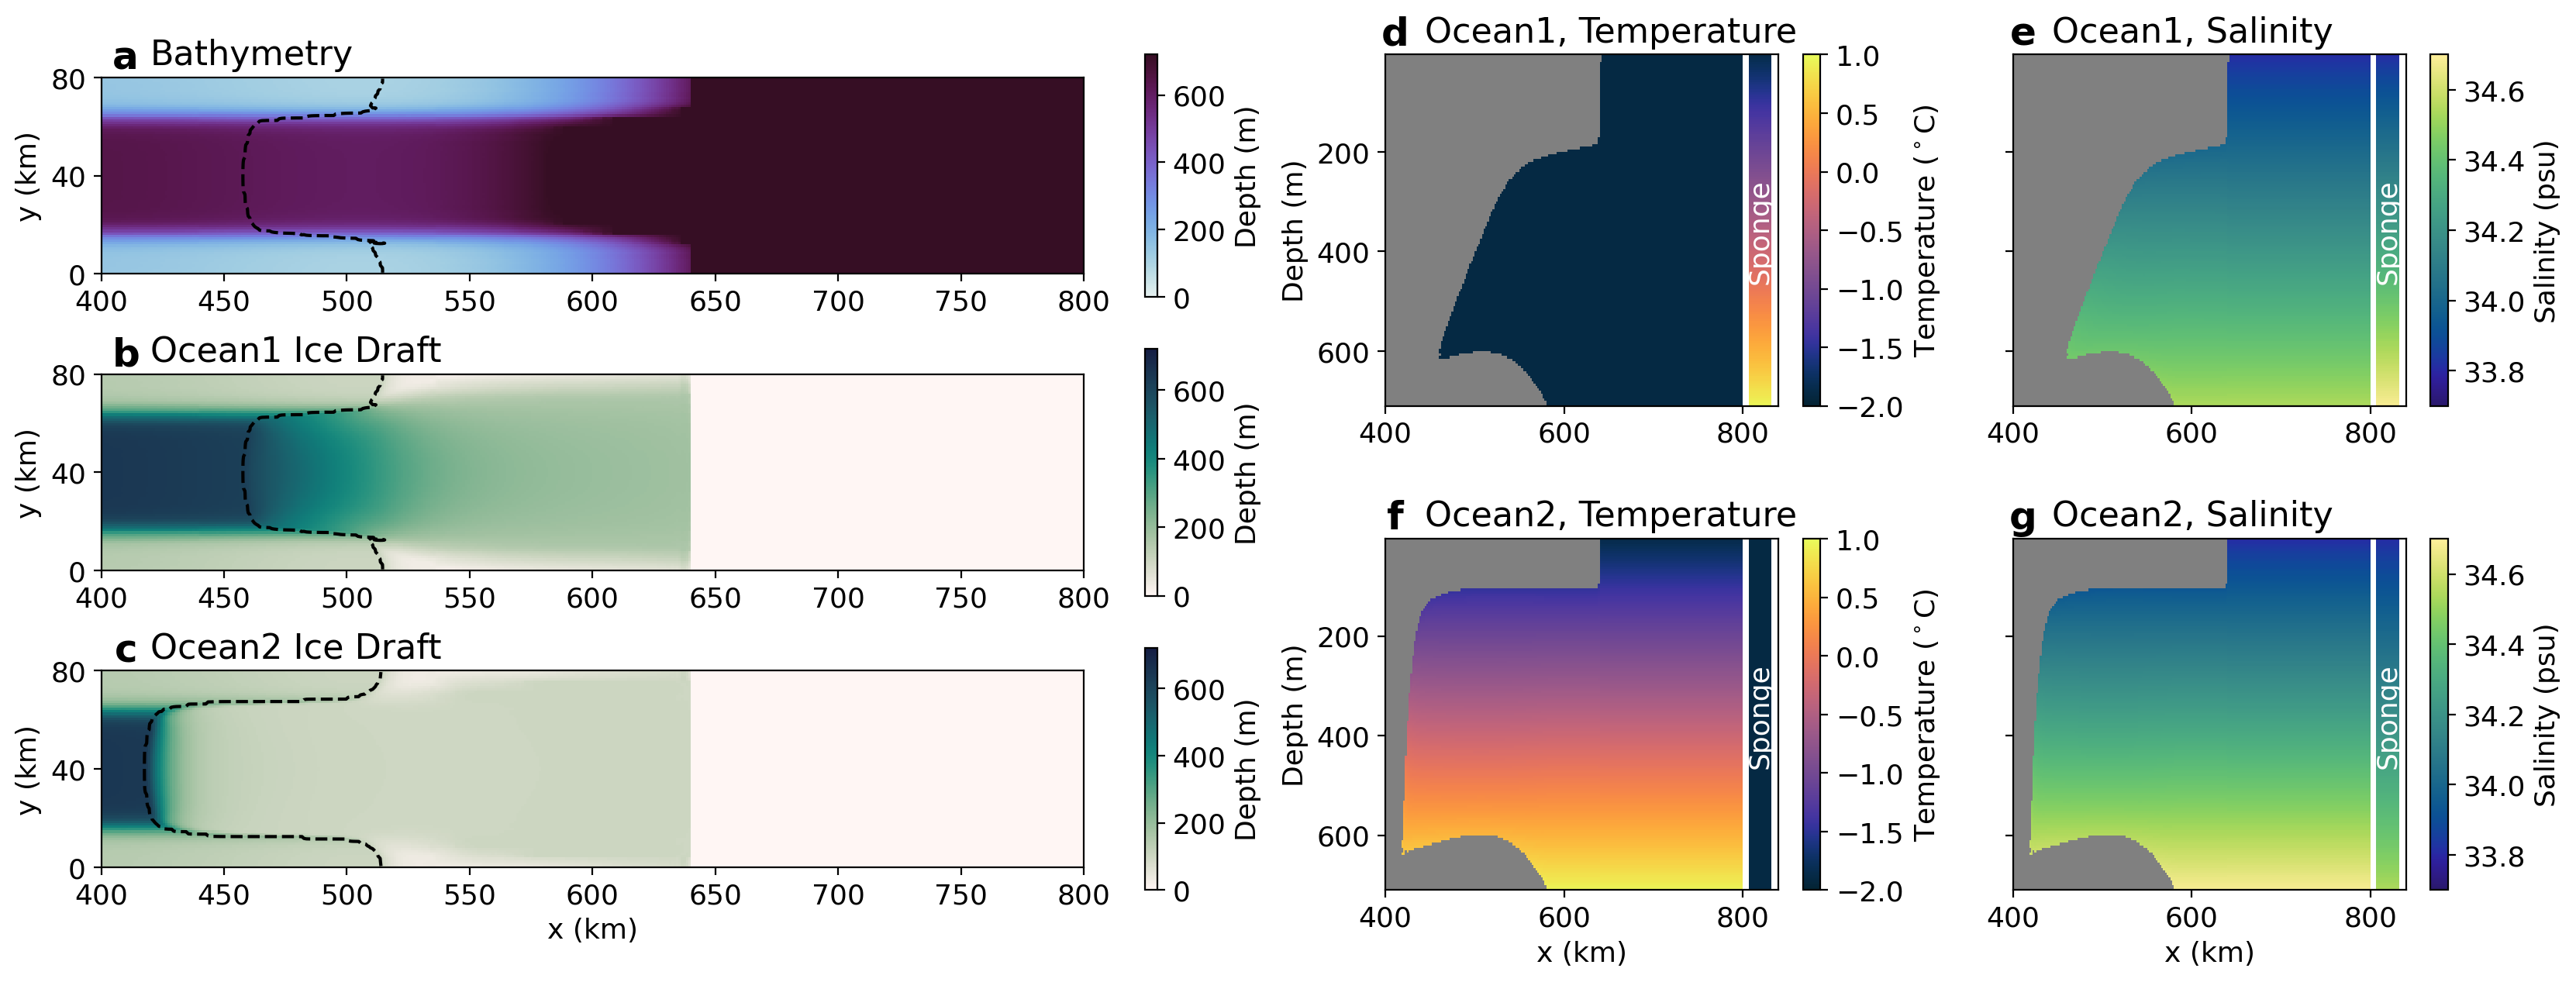

In [21]:
gs = gridspec.GridSpec(7,4,width_ratios=[2.5, 1,0.05,1], height_ratios = [1,1,0.6,0.3,0.6,1,1]) 
fig = plt.figure(figsize=(20,7),facecolor='w',dpi = 200)
ax0, ax1, ax2, ax3, ax4, ax5, ax6 = plt.subplot(gs[0:2,0]), plt.subplot(gs[2:5,0]), plt.subplot(gs[5:,0]), plt.subplot(gs[0:3,1]), plt.subplot(gs[0:3,3]), plt.subplot(gs[4:,1]), plt.subplot(gs[4:,3])
#gs.update(wspace = 0.3, hspace = 0.35)
xlim = [400., 800.]
xlim2 = [400., 840.]

#plot bathymetry and ice draft from input files

vmin = 0; vmax = 720
mesh = ax0.pcolormesh(
        1e-3 * Ocean1_input.x.values, 1e-3 * Ocean1_input.y.values, -Ocean1_input.bedrockTopography.values, 
        cmap=cm.cm.dense, vmin=vmin, vmax=vmax, shading='nearest')
ax0.contour(
        1e-3 * Ocean1_input.x.values, 1e-3 * Ocean1_input.y.values, -Ocean1_input.lowerSurface.where(Ocean1_input.x<525e3).values+Ocean1_input.bedrockTopography.values, 
        levels = [-0.5],colors = 'k')
ax0.set_xlim(xlim)
mesh.axes.set_aspect('equal')
plt.colorbar(mesh, ax = ax0, label = 'Depth (m)')
ax0.set_title('Bathymetry', fontsize = 16,ha='left', x=0.05)
ax0.text(0.025,1.1,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax0.transAxes, fontsize = 18)

vmin = 0; vmax = 720
mesh = ax1.pcolormesh(
        1e-3 * Ocean1_input.x.values, 1e-3 * Ocean1_input.y.values, -Ocean1_input.lowerSurface.values, 
        cmap=cm.cm.tempo, vmin=vmin, vmax=vmax, shading='nearest')
ax1.contour(
        1e-3 * Ocean1_input.x.values, 1e-3 * Ocean1_input.y.values, -Ocean1_input.lowerSurface.where(Ocean1_input.x<525e3).values+Ocean1_input.bedrockTopography.values, 
        levels = [-0.5],colors = 'k')
ax1.set_xlim(xlim)
mesh.axes.set_aspect('equal')
plt.colorbar(mesh, ax = ax1, label = 'Depth (m)')

ax1.set_title('Ocean1 Ice Draft', fontsize = 16, ha='left', x=0.05)
ax1.text(0.025,1.1,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax1.transAxes, fontsize = 18)

vmin = 0; vmax = 720
mesh = ax2.pcolormesh(
        1e-3 * Ocean2_input.x.values, 1e-3 * Ocean2_input.y.values, -Ocean2_input.lowerSurface.values, 
        cmap=cm.cm.tempo, vmin=vmin, vmax=vmax, shading='nearest')
ax2.contour(
        1e-3 * Ocean2_input.x.values, 1e-3 * Ocean2_input.y.values, -Ocean2_input.lowerSurface.values+Ocean2_input.bedrockTopography.values, 
        levels = [-1],colors = 'k')
ax2.set_xlim(xlim)
mesh.axes.set_aspect('equal')
plt.colorbar(mesh, ax = ax2, label = 'Depth (m)')
ax2.set_title('Ocean2 Ice Draft', fontsize = 16, ha='left', x=0.05)
ax2.text(0.025,1.1,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax2.transAxes, fontsize = 18)

#plot Tand S from ROMS data and sponge

expt = Ocean1_COM
model = -1 #ROMS
data = xr.open_dataset(basedrive+expt[model], decode_times=False)
data = data.set_coords(['x', 'y','z', 'time'])

expt = Ocean2_COM
data2 = xr.open_dataset(basedrive+expt[model], decode_times=False)
data2 = data2.set_coords(['x', 'y','z',  'time'])


mesh = ax3.pcolormesh(
        1e-3 * data.x.values, -data.z.values, data.temperatureXZ.isel(nTime = 0).values, 
        cmap=cm.cm.thermal, vmin=-2, vmax=1, shading='nearest')
ax3.set_xlim(xlim2)
plt.colorbar(mesh, ax = ax3, label = 'Temperature ($^\circ$C)')

Tspongewarm = (data2.temperatureXZ.isel(nTime = 0).isel(nx = slice(-3,-1)).values)
xssponge = np.linspace(813,826,2)
ax3.pcolormesh(xssponge,-data.z.values,Tspongewarm, 
               cmap=cm.cm.thermal, vmin=-2, vmax=1, shading='nearest')
ax3.text(820,360,'Sponge', rotation = 90, color = 'w',
         horizontalalignment='center', verticalalignment='center')

mesh = ax4.pcolormesh(
        1e-3 * data.x.values, -data.z.values, data.salinityXZ.isel(nTime = 0).values, 
        cmap=cm.cm.haline, vmin=33.7, vmax=34.7, shading='nearest')
ax4.set_xlim(xlim2)
plt.colorbar(mesh, ax = ax4, label = 'Salinity (psu)')

Sspongewarm = (data2.salinityXZ.isel(nTime = 0).isel(nx = slice(-3,-1)).values)
xssponge = np.linspace(813,826,2)
ax4.pcolormesh(xssponge,-data.z.values,Sspongewarm, 
               cmap=cm.cm.haline, vmin=33.7, vmax=34.7, shading='nearest')
ax4.text(820,360,'Sponge', rotation = 90, color = 'w',
         horizontalalignment='center', verticalalignment='center')


mesh = ax5.pcolormesh(
        1e-3 * data2.x.values, -data2.z.values, data2.temperatureXZ.isel(nTime = 0).values, 
        cmap=cm.cm.thermal, vmin=-2, vmax=1, shading='nearest')
ax5.set_xlim(xlim2)
plt.colorbar(mesh, ax = ax5, label = 'Temperature ($^\circ$C)')

Tspongecold = (data.temperatureXZ.isel(nTime = 0).isel(nx = slice(-3,-1)).values)
xssponge = np.linspace(813,826,2)
ax5.pcolormesh(xssponge,-data.z.values,Tspongecold, 
               cmap=cm.cm.thermal, vmin=-2, vmax=1, shading='nearest')
ax5.text(820,360,'Sponge', rotation = 90, color = 'w',
         horizontalalignment='center', verticalalignment='center')


mesh = ax6.pcolormesh(
        1e-3 * data2.x.values, -data2.z.values, data2.salinityXZ.isel(nTime = 0).values, 
        cmap=cm.cm.haline, vmin=33.7, vmax=34.7, shading='nearest')
ax6.set_xlim(xlim2)
plt.colorbar(mesh, ax = ax6, label = 'Salinity (psu)')

Sspongecold = (data.salinityXZ.isel(nTime = 0).isel(nx = slice(-3,-1)).values)
xssponge = np.linspace(813,826,2)
ax6.pcolormesh(xssponge,-data.z.values,Sspongecold, 
               cmap=cm.cm.haline, vmin=33.7, vmax=34.7, shading='nearest')
ax6.text(820,360,'Sponge', rotation = 90, color = 'w',
         horizontalalignment='center', verticalalignment='center')

ax3.set_title('Ocean1, Temperature', fontsize = 16,ha='left', x=0.1)
ax3.text(0.025,1.06,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax3.transAxes, fontsize = 18)

ax4.set_title('Ocean1, Salinity', fontsize = 16,ha='left', x=0.1)
ax4.text(0.025,1.06,'e',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax4.transAxes, fontsize = 18)

ax5.set_title('Ocean2, Temperature', fontsize = 16,ha='left', x=0.1)
ax5.text(0.025,1.06,'f',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax5.transAxes, fontsize = 18)

ax6.set_title('Ocean2, Salinity', fontsize = 16,ha='left', x=0.1)
ax6.text(0.025,1.06,'g',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax6.transAxes, fontsize = 18)


ax3.set_ylim(710,5)
ax4.set_ylim(710,5)
ax5.set_ylim(710,5)
ax6.set_ylim(710,5)


ax3.set_ylabel('Depth (m)')
ax5.set_ylabel('Depth (m)')
ax4.set_yticklabels('')
ax6.set_yticklabels('')

ax2.set_xlabel('x (km)')
ax5.set_xlabel('x (km)')
ax6.set_xlabel('x (km)')

ax0.set_ylabel('y (km)')
ax1.set_ylabel('y (km)')
ax2.set_ylabel('y (km)')

ax0.set_yticks([0,40,80])
ax1.set_yticks([0,40,80])
ax2.set_yticks([0,40,80])

fig.subplots_adjust(wspace = 0.1, hspace = 0.7)
# data.iceDraft.isel(nTime=0).